# Lab 1

April 12, 2021

Igor Sheremet and Aakansha Bhatt

Clear the variable in case there are stale variables that might break things. Then import the libraries that will be needed.

In [29]:
# clear variables
from IPython import get_ipython
get_ipython().magic('reset -sf')

# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import timeit

## Read in the Image

Download the [test image](https://drive.google.com/file/d/1kl5i905HVaMUQArcLpNo1EvFNE9JK8kV/view?usp=sharing) and put it in the same directory as this notebook.

Read in the image, convert it to grayscale, and display the grayscale image.

(-0.5, 255.5, 255.5, -0.5)

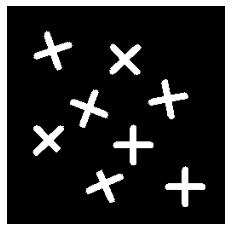

In [30]:
# read in image
img = mpimg.imread('proj1-bw.gif')

# convert image to grayscale
imgGray = np.rint(np.dot(img[:,:,:3],[0.2989,0.5870,0.1140]))

# show image
plt.imshow(imgGray, cmap='gray')

# remove the axis
plt.axis('off')

## Connected-component Grouping with 'One Component at a Time' Algorithm

First, the input grayscale image is converted to an array of background (value 0) pixels and foreground (value 1) pixels. The foreground and background are determined by checking if the pixel value is bellow or above a threshold. If the grayscale pixel value is over the threshold it is foreground, and it is background otherwise. The connected-component objects are then found in the array with the 'one component at a time' algorithm. Here are the steps of the algorithm:

    1. Start with the first pixel and set the label counter to 1. 
    
    2. Scan the image pixel-by-pixel (raster), find the first foreground pixel, assign a label to it, and add it to the queue. 

    3. Pop an item from the queue, and check its neighbors (8-adjecent)
        i. If a neighbor is foreground and not labeled, assign a label to it and add it to the queue. 
        ii. Repeat 3 until the queue is empty.

    3. Increment the label count and go back to 2 to continue scannning the rest of the pixels

In [31]:
def ccGroup(imgIn):

    # convert grayscale image to a black and white (ie background and foregrond) image 
    # by setting all values under threshold to 0, and overthreshold to 1 
    imgBw = np.zeros(imgIn.shape)
    threshold = 128
    imgBw[imgIn >= threshold] = 1
    
    # add black lines around image to make it easier to check pixels on the edges 
    # of the image
    imgBwExpanded = np.zeros((imgBw.shape[0]+2,imgBw.shape[1]+2))
    imgBwExpanded[1:-1,1:-1] = imgBw

    # initialize an array that will store the label for each pixel; 0 means that the
    # pixel is not labeled, 1 means that its label 1, 2 means that its label 2, etc
    pixelLabeles = np.zeros(imgBw.shape)

    # iniliazlize queue and current label value
    pixelQueue = []
    currentLabel = 1

    # iterate over the image pixels and pixel labels
    it = np.nditer([imgBw,pixelLabeles], flags=['multi_index'], op_flags=['readwrite'])

    for pixel,pixelLabel in it:
        # check if pixel is white and not labeled
        if pixel == 1 and pixelLabel == 0:
            # add pixel index to queue
            pixelQueue.append(it.multi_index)

            # add label for the pixel
            pixelLabel[...] = currentLabel

            # while queue is not empty, pop an element from the queue and check its neighbors
            while pixelQueue:
                currentPixelIndex = pixelQueue.pop()

                # convert the pixel index to neighbor indexes
                neighbor1Idx = (currentPixelIndex[0]-1,currentPixelIndex[1]-1)
                neighbor2Idx = (currentPixelIndex[0]-1,currentPixelIndex[1])
                neighbor3Idx = (currentPixelIndex[0]-1,currentPixelIndex[1]+1)
                neighbor4Idx = (currentPixelIndex[0],currentPixelIndex[1]-1)
                neighbor5Idx = (currentPixelIndex[0],currentPixelIndex[1]+1)
                neighbor6Idx = (currentPixelIndex[0]+1,currentPixelIndex[1]-1)
                neighbor7Idx = (currentPixelIndex[0]+1,currentPixelIndex[1])
                neighbor8Idx = (currentPixelIndex[0]+1,currentPixelIndex[1]+1)

                # check north-west neighbor
                if imgBwExpanded[neighbor1Idx[0]+1,neighbor1Idx[1]+1]== 1:
                    # if a neighbor is white and not labeled, label pixel and add pixel to queue
                    if pixelLabeles[neighbor1Idx] == 0:
                        pixelQueue.append(neighbor1Idx)
                        pixelLabeles[neighbor1Idx] = currentLabel
                        
                # check north neighbor
                if imgBwExpanded[neighbor2Idx[0]+1,neighbor2Idx[1]+1]== 1:
                    if pixelLabeles[neighbor2Idx] == 0:
                        pixelQueue.append(neighbor2Idx)
                        pixelLabeles[neighbor2Idx] = currentLabel

                # check north-east neighbor
                if imgBwExpanded[neighbor3Idx[0]+1,neighbor3Idx[1]+1]== 1:
                    if pixelLabeles[neighbor3Idx] == 0:
                        pixelQueue.append(neighbor3Idx)
                        pixelLabeles[neighbor3Idx] = currentLabel

                # check west neighbor
                if imgBwExpanded[neighbor4Idx[0]+1,neighbor4Idx[1]+1]== 1:
                    if pixelLabeles[neighbor4Idx] == 0:
                        pixelQueue.append(neighbor4Idx)
                        pixelLabeles[neighbor4Idx] = currentLabel

                # check east neighbor
                if imgBwExpanded[neighbor5Idx[0]+1,neighbor5Idx[1]+1]== 1:
                    if pixelLabeles[neighbor5Idx] == 0:
                        pixelQueue.append(neighbor5Idx)
                        pixelLabeles[neighbor5Idx] = currentLabel

                # check south-west neighbor
                if imgBwExpanded[neighbor6Idx[0]+1,neighbor6Idx[1]+1]== 1:
                    if pixelLabeles[neighbor6Idx] == 0:
                        pixelQueue.append(neighbor6Idx)
                        pixelLabeles[neighbor6Idx] = currentLabel

                # check south neighbor
                if imgBwExpanded[neighbor7Idx[0]+1,neighbor7Idx[1]+1]== 1:
                    if pixelLabeles[neighbor7Idx] == 0:
                        pixelQueue.append(neighbor7Idx)
                        pixelLabeles[neighbor7Idx] = currentLabel

                # check south-east neighbor
                if imgBwExpanded[neighbor8Idx[0]+1,neighbor8Idx[1]+1]== 1:
                    if pixelLabeles[neighbor8Idx] == 0:
                        pixelQueue.append(neighbor8Idx)
                        pixelLabeles[neighbor8Idx] = currentLabel

            # increment current label
            currentLabel = currentLabel + 1

    # determine number of objects in the image
    numObjects = currentLabel-1

    # determine number of intensity levels to space apart the intensity levels of each object
    objectIntensityDiff = np.rint(256/numObjects)

    # replace each object label value with intensity level value
    for obj in range(1,numObjects+1):
        pixelLabeles[pixelLabeles == obj] = obj*objectIntensityDiff

    return pixelLabeles,numObjects


## Process the Grayscale Image

Run the grayscale image through the connected-component grouping function to display the results.

Found 8 clusters in the image


(-0.5, 255.5, 255.5, -0.5)

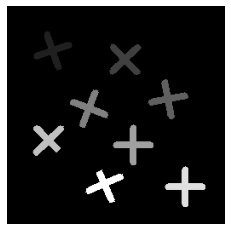

In [32]:
# run connected-component grouping function on image
outImg,n = ccGroup(imgGray)

# display how many clusters were found in the image
print('Found %i clusters in the image' % n)

# plot output image
plt.imshow(outImg, cmap='gray')

# remove the axis
plt.axis('off')

## Time How Long the Grouping Takes

In [33]:
%%timeit
outImg,n = ccGroup(imgGray)

172 ms ± 9.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
